m_y -306.1370774907363
m_z -37.93686443555595
chi_y -14.635876804645289
chi_z 0.0
m_y -284.0909184143424
m_z -120.21425031892105
chi_y -14.635876804645289
chi_z 0.0
(None, None, None)


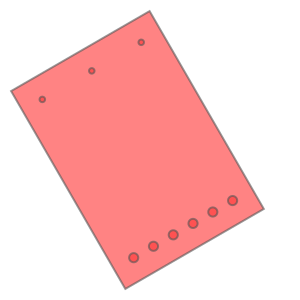

In [29]:
import math

from shapely import Polygon

from structuralcodes import codes, materials
from structuralcodes.geometry import SurfaceGeometry
from structuralcodes.sections._generic import GenericSection
from structuralcodes.sections._reinforcement import add_reinforcement_line

# from structuralcodes.plots.section_plots import draw_section_response,draw_section,get_stress_point


codes.set_design_code(design_code='ec2_2004')
# Create materials
concrete = materials.concrete.create_concrete(fck=25)
reinforcemnet = materials.reinforcement.create_reinforcement(
    fyk=500,
    Es=200000,
    density=7850,
    ftk=500,
    epsuk=0.07,
)
# Create section
poly = Polygon(((0, 0), (350, 0), (350, 500), (0, 500)))
geo = SurfaceGeometry(poly, concrete)
geo = add_reinforcement_line(geo, (50, 450), (300, 450), 12, reinforcemnet, n=3)
geo = add_reinforcement_line(geo, (50, 50), (300, 50), 20, reinforcemnet, n=6)
sec = GenericSection(geo)


n = 0 * 1e3
my = -284 * 1e6
mz = -120 * 1e6
theta_deg = 30
#res = sec.section_calculator.calculate_strain_profile(n, my, mz)
#print(res)



#ESTO devuelve my mz en ejes globales!!!!
res2 = sec.section_calculator.calculate_bending_strength(
    theta_deg * math.pi / 180, 0
)
print('m_y', res2.m_y / 1e6)
print('m_z', res2.m_z / 1e6)
print('chi_y', res2.chi_y * 1e6)
print('chi_z', res2.chi_z * 1e6)


# ESTO devuelve my mz en ejes rotados!!!!
rot_sec = GenericSection(geo.rotate(theta_deg * math.pi / 180))
res2 = rot_sec.section_calculator.calculate_bending_strength(0, 0)
print('m_y', res2.m_y / 1e6)
print('m_z', res2.m_z / 1e6)
print('chi_y', res2.chi_y * 1e6)
print('chi_z', res2.chi_z * 1e6)


res = sec.section_calculator.calculate_strain_profile(n, my, mz)
print(res)

rot_sec.geometry